In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

2022-03-01 15:50:26.269802: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-01 15:50:26.269913: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data/64x64/"
path

'/home/romain/code/christophelanson/icangetyoursmile/raw_data/64x64/'

In [4]:
number = 10
str(number).zfill(4)

'0010'

In [5]:
# create x and y train
data_size = 100
X_train = []
y_train = []
for number in range(data_size):
    no_mask_path = f'{path}No_mask/seed{str(number).zfill(4)}.png'
    no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
    mask_path = f'{path}Mask/with-mask-default-mask-seed{str(number).zfill(4)}.png'
    mask_im = np.asarray(Image.open(mask_path)).tolist()
    X_train.append(mask_im)
    y_train.append(no_mask_im)

In [6]:
len(mask_im)

64

In [7]:
X_test = Image.open(f'{path}Mask/with-mask-default-mask-seed{1234}.png')
X_test = np.asarray(X_test).tolist()
X_test

[[[83, 80, 70],
  [85, 80, 70],
  [84, 80, 69],
  [87, 83, 74],
  [79, 75, 65],
  [78, 76, 68],
  [88, 87, 79],
  [96, 96, 87],
  [94, 95, 89],
  [88, 89, 81],
  [91, 91, 85],
  [86, 85, 79],
  [84, 81, 75],
  [84, 81, 74],
  [70, 68, 60],
  [69, 66, 58],
  [74, 70, 61],
  [76, 73, 62],
  [80, 79, 74],
  [74, 72, 64],
  [86, 82, 72],
  [76, 74, 64],
  [45, 43, 36],
  [45, 42, 36],
  [73, 75, 64],
  [97, 101, 92],
  [96, 100, 92],
  [95, 103, 93],
  [102, 110, 99],
  [89, 97, 88],
  [77, 79, 68],
  [68, 67, 58],
  [74, 72, 65],
  [79, 78, 68],
  [83, 80, 69],
  [76, 73, 64],
  [83, 82, 75],
  [85, 84, 78],
  [84, 82, 77],
  [94, 93, 84],
  [86, 87, 78],
  [79, 78, 70],
  [85, 83, 74],
  [87, 84, 76],
  [80, 76, 68],
  [84, 80, 68],
  [94, 94, 81],
  [91, 91, 78],
  [85, 86, 78],
  [90, 91, 86],
  [95, 93, 84],
  [89, 87, 78],
  [79, 80, 74],
  [74, 74, 68],
  [75, 73, 66],
  [82, 80, 73],
  [84, 83, 77],
  [85, 83, 78],
  [87, 81, 73],
  [79, 76, 69],
  [78, 77, 71],
  [72, 70, 64],
  [

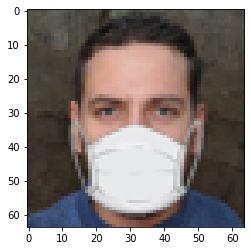

In [8]:
plt.imshow(X_test)

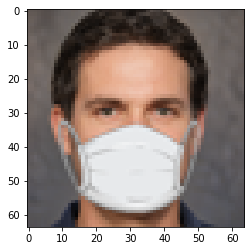

In [9]:
plt.imshow(X_train[20])

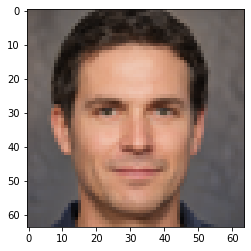

In [10]:
plt.imshow(y_train[20])

In [11]:
from icangetyoursmile.models import unet, create_data_augmentation_model

In [12]:
model = unet()

2022-03-01 15:50:34.244002: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-03-01 15:50:34.244121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-MPVTJ3SV): /proc/driver/nvidia/version does not exist
2022-03-01 15:50:34.244634: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
#model.summary()

In [14]:
model.fit(X_train, y_train, batch_size=8, epochs=20)

Epoch 1/20
13/13 [==============================] - 5s 103ms/step - loss: 13927.6016
Epoch 2/20
13/13 [==============================] - 1s 87ms/step - loss: 9304.9053
Epoch 3/20
13/13 [==============================] - 1s 84ms/step - loss: 8202.6826
Epoch 4/20
13/13 [==============================] - 1s 89ms/step - loss: 7567.4390
Epoch 5/20
13/13 [==============================] - 1s 89ms/step - loss: 6964.3755
Epoch 6/20
13/13 [==============================] - 1s 102ms/step - loss: 6632.5425
Epoch 7/20
13/13 [==============================] - 1s 103ms/step - loss: 6404.5898
Epoch 8/20
13/13 [==============================] - 1s 100ms/step - loss: 6208.2388
Epoch 9/20
13/13 [==============================] - 1s 99ms/step - loss: 6047.0151
Epoch 10/20
13/13 [==============================] - 1s 100ms/step - loss: 5900.2920
Epoch 11/20
13/13 [==============================] - 1s 102ms/step - loss: 5773.9292
Epoch 12/20
13/13 [==============================] - 1s 99ms/step - loss: 5640

In [15]:
#model.evaluate(X_train,y_train)

In [16]:
np.asarray(X_test).shape

(64, 64, 3)

In [17]:
np.expand_dims(X_test,0).shape

(1, 64, 64, 3)

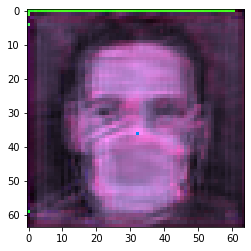

In [18]:
plt.imshow(np.squeeze(model.predict(np.expand_dims(X_test,0))).astype(np.uint8))

In [59]:
from icangetyoursmile.utils import save_model, test, loading_model

In [ ]:
save_model(model, "dummy")

In [57]:
tests = test()

In [73]:
new_mo = loading_model("second")

In [74]:
new_mo

In [75]:
type(new_mo)

keras.engine.functional.Functional

In [76]:
new_mo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 8)    224         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 8)    584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 32, 32, 8)    0           ['conv2d_1[0][0]']               
                                                                                              

Total params: 485,835
Trainable params: 485,835
Non-trainable params: 0
__________________________________________________________________________________________________
